In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import json
import os

## 1. Processing the dataset

In [3]:
train_path = r"/kaggle/input/cards-image-datasetclassification/train"
test_path = r"/kaggle/input/cards-image-datasetclassification/test"
validation_path = r"/kaggle/input/cards-image-datasetclassification/valid"

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Data Augmentation sólo para TRAIN
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    vertical_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode ="categorical"
)

val_generator = val_datagen.flow_from_directory(
    validation_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    shuffle=False
)

test_generator = val_datagen.flow_from_directory(
    test_path,
    batch_size=BATCH_SIZE,
    target_size=IMG_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


## 2. Modelo

In [18]:
NUM_CLASSES = 53
IMG_SIZE = (224,224)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 103s 386ms/step - accuracy: 0.1552 - loss: 3.5048 - val_accuracy: 0.3925 - val_loss: 2.0668
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 80s 324ms/step - accuracy: 0.3278 - loss: 2.3398 - val_accuracy: 0.4377 - val_loss: 1.8054
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 80s 324ms/step - accuracy: 0.3886 - loss: 2.0441 - val_accuracy: 0.4642 - val_loss: 1.7173
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 84s 341ms/step - accuracy: 0.4161 - loss: 1.9219 - val_accuracy: 0.4566 - val_loss: 1.6496
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 351ms/step - accuracy: 0.4565 - loss: 1.7765 - val_accuracy: 0.4906 - val_loss: 1.6837
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 347ms/step - accuracy: 0.4804 - loss: 1.6913 - val_accuracy: 0.4868 - val_loss: 1.6762
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 344ms/step - accuracy: 0.4860 - loss: 1.6780 - val_accuracy: 0.5019 - val_loss: 1.5656
Epoch 8/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 86s 348ms/step - accuracy: 0.5141 - loss: 

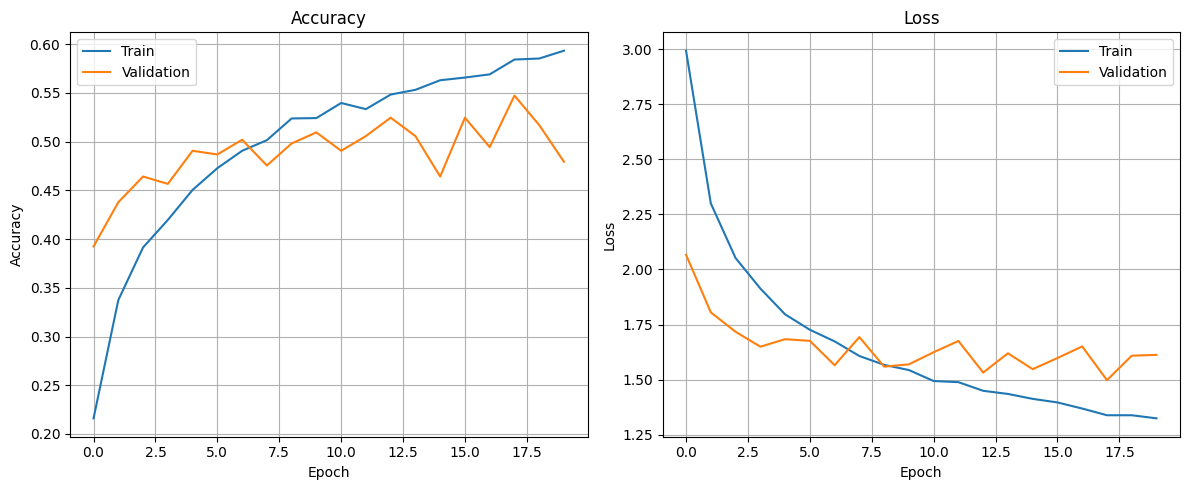

In [21]:
hist_df = pd.DataFrame(history.history)

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
hist_df[['accuracy', 'val_accuracy']].plot(ax=plt.gca())
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
hist_df[['loss', 'val_loss']].plot(ax=plt.gca())
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
class_names = sorted(os.listdir(train_path))
print(f"Nombres de las clases encontradas: {class_names}")
print(f"Número total de clases: {len(class_names)}")

Nombres de las clases encontradas: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']
Número

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
                   precision    recall  f1-score   support

     ace of clubs       0.71      1.00      0.83         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       0.50      1.00      0.67         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       0.00      0.00      0.00         5
eight of diamonds       0.42      1.00      0.59         5
  eight of hearts       1.00      0.60      0.75         5
  eight of spades       0.25      0.20      0.22         5
    five of clubs       0.50      0.40      0.44         5
 five of diamonds       0.57      0.80      0.67         5
   five of hearts       0.33      0.40      0.36         5
   five of spades       0.60      0.60      0.60         5
    four of clubs       0.50      0.20      0.29         5
 four of diamonds       1.00      0.60      0.75         5
   four of hearts       0.80      0.80      0.80         5
   four of spades

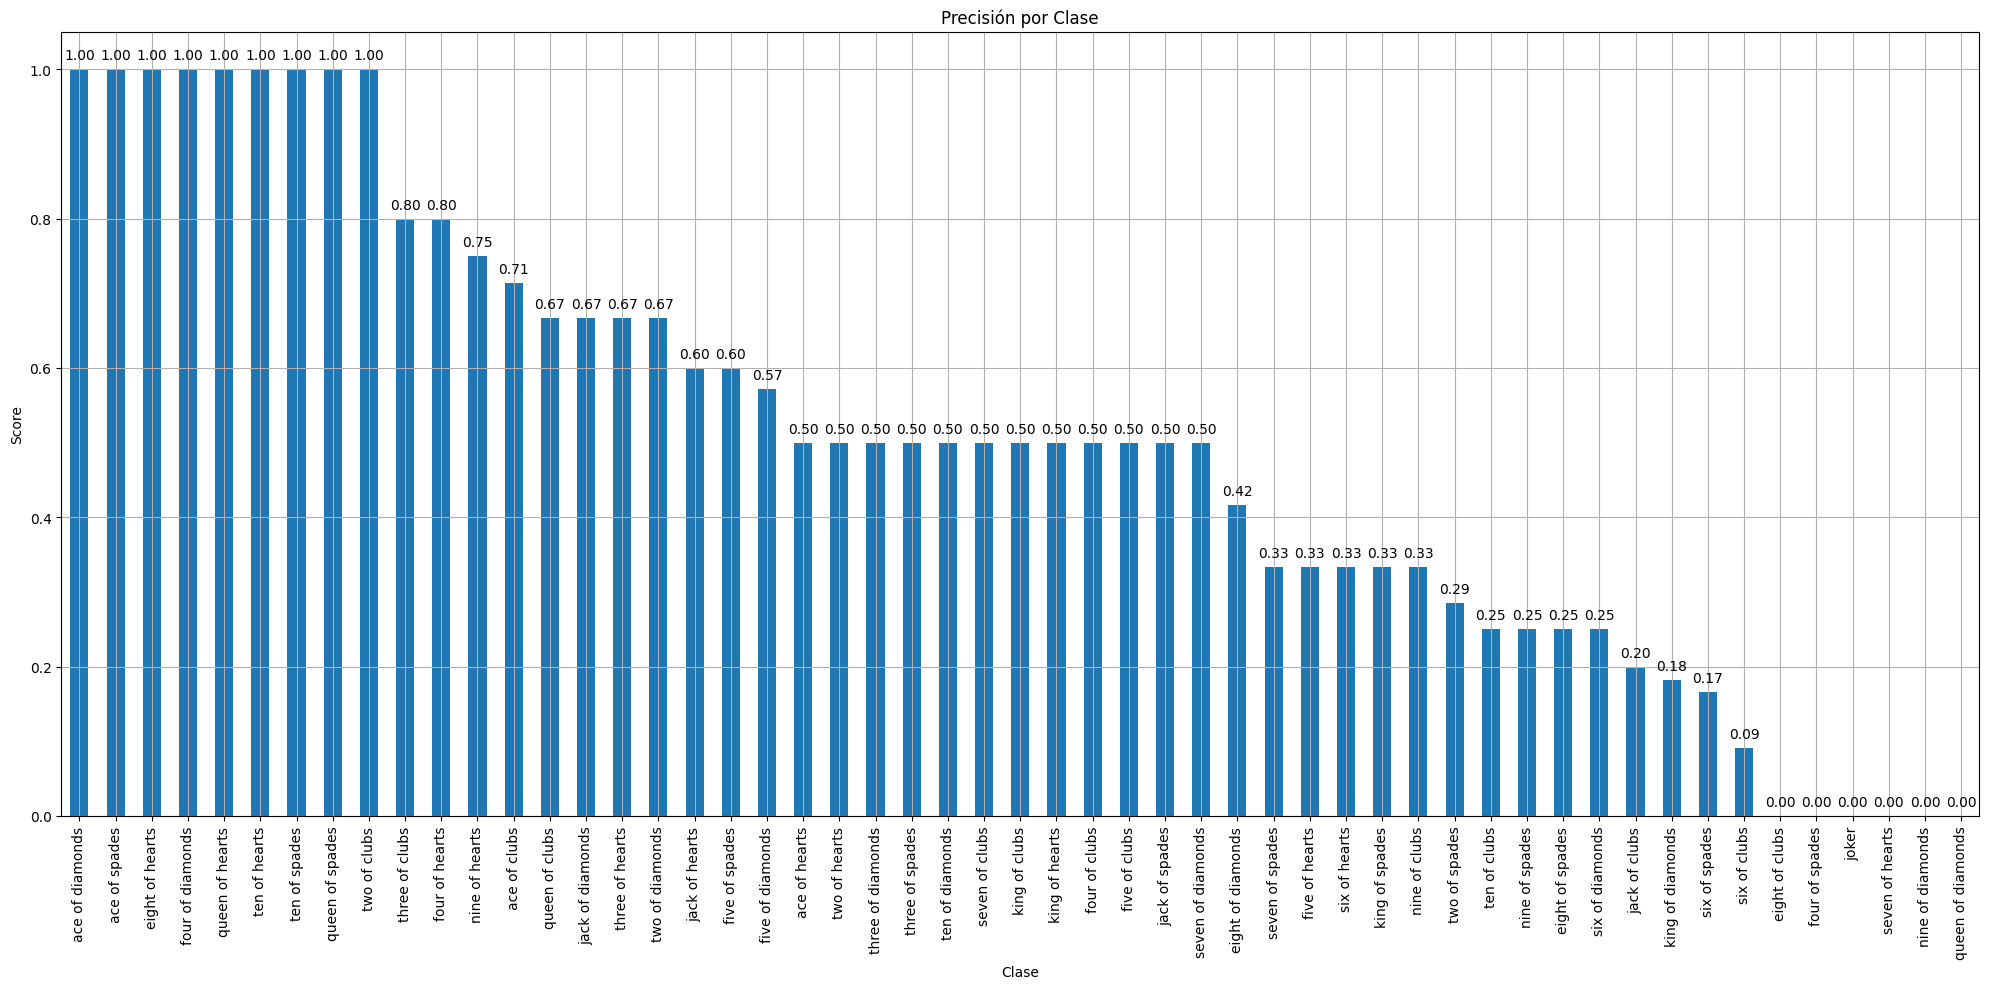

In [36]:
# Obtener predicciones
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
report = classification_report(y_true, y_pred, target_names=class_names, zero_division=0, output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])
report_df = report_df.sort_values(by='precision', ascending=False)

# Gráfica de barras para precisión por clase
plt.figure(figsize=(20, 10))
ax = report_df['precision'].plot(kind='bar', figsize=(20, 10))
plt.title("Precisión por Clase")
plt.xlabel("Clase")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.grid(True)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

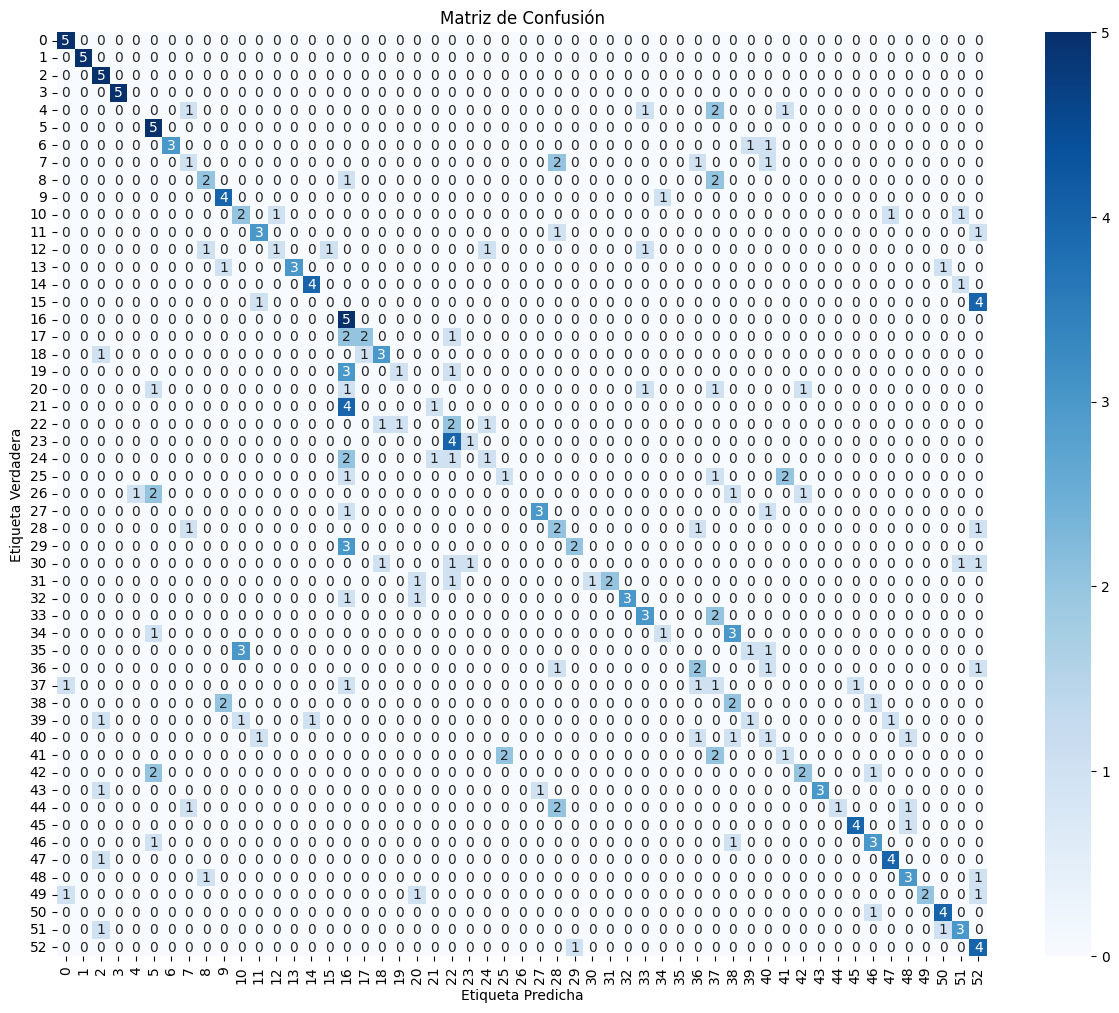

In [31]:
# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt="g"Z, cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Etiqueta Verdadera")
plt.xlabel("Etiqueta Predicha")
plt.show()

In [37]:
PROJECT_PATH = "/kaggle/working/"

model.save(PROJECT_PATH + "classifier_model_v4.h5")

with open(PROJECT_PATH + 'history_4.json', 'w') as f:
    json.dump(history.history, f)